In [10]:
#importing neccessary files

import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load dataset
df = pd.read_csv('scraped_books.csv')

In [6]:
# Pre Processing Of the dataset

# ----- 1. Remove Duplicates -----
df.drop_duplicates(inplace=True)

# ----- 2. Handle Null Values -----
# View null counts
print("Null values before handling:\n", df.isnull().sum())

# Drop rows with null in essential columns (like price, title, availability)
df.dropna(subset=['Title', 'Price', 'Availability'], inplace=True)

# Optional: Fill other nulls with defaults (if any)
df['Rating'].fillna('0', inplace=True)

# ----- 3. Convert Price: Remove £ Symbol and Convert to Float -----
df['Price'] = df['Price'].replace('£', '', regex=True).astype(float)

# ----- 4. Check and Handle Skewness (for 'price' column) -----
price_skew = skew(df['Price'])
print("Price skewness before transformation:", price_skew)

# If skewness is high (e.g., > 1 or < -1), apply log transformation
if abs(price_skew) > 1:
    df['price_log'] = np.log1p(df['Price'])  # log(1 + price)
    print("Skewness after log transformation:", skew(df['price_log']))
else:
    df['price_log'] = df['Price']

# ----- Optional: Confirm preprocessing -----
print("\nCleaned Data Sample:")
print(df.head())

Null values before handling:
 Title           0
Price           0
Availability    0
Rating          0
price_log       0
dtype: int64
Price skewness before transformation: -0.03745836406604919

Cleaned Data Sample:
                                   Title  Price Availability  Rating  \
0                   A Light in the Attic  51.77     In stock       3   
1                     Tipping the Velvet  53.74     In stock       1   
2                             Soumission  50.10     In stock       1   
3                          Sharp Objects  47.82     In stock       4   
4  Sapiens: A Brief History of Humankind  54.23     In stock       5   

   price_log  
0      51.77  
1      53.74  
2      50.10  
3      47.82  
4      54.23  


C:\Users\HP\AppData\Local\Temp\ipykernel_5720\3660839751.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna('0', inplace=True)


In [9]:
#Basic EDA

# Number of books
num_books = len(df)

# Average price
avg_price = df['Price'].mean()

# Rating distribution
rating_dist = df['Rating'].value_counts().sort_index()

# Availability distribution
availability_dist = df['Availability'].value_counts()

# Display results
print("📘 Total number of books:", num_books)
print("💰 Average price: £{:.2f}".format(avg_price))
print("\n⭐ Rating distribution:")
print(rating_dist)
print("\n📦 Availability distribution:")
print(availability_dist)


📘 Total number of books: 1000
💰 Average price: £35.07

⭐ Rating distribution:
Rating
1    226
2    196
3    203
4    179
5    196
Name: count, dtype: int64

📦 Availability distribution:
Availability
In stock    1000
Name: count, dtype: int64


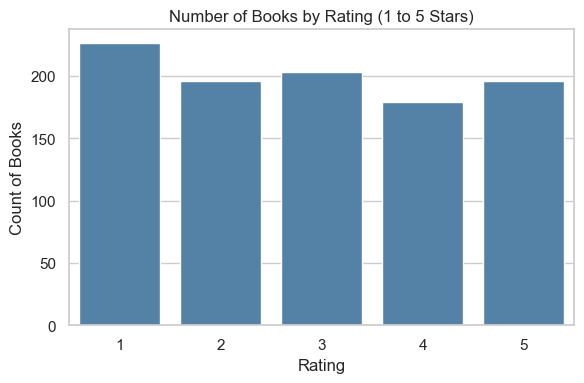

In [16]:
#Bar Chart — Number of Books by Rating

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
# Explicitly set color instead of palette to avoid future warning
sns.countplot(x='Rating', data=df, color='steelblue')
plt.title('Number of Books by Rating (1 to 5 Stars)')
plt.xlabel('Rating')
plt.ylabel('Count of Books')
plt.tight_layout()
plt.show()

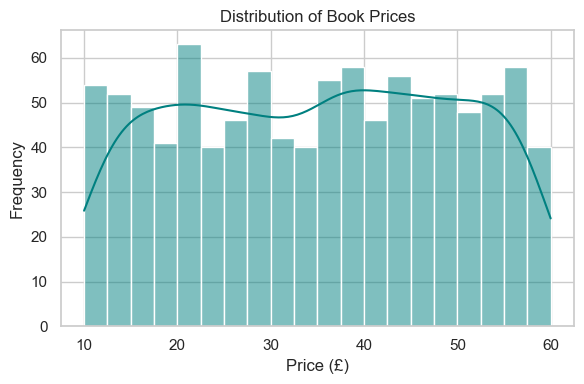

In [12]:
# Histogram — Distribution of Book Prices
plt.figure(figsize=(6, 4))
sns.histplot(df['Price'], bins=20, kde=True, color='teal')
plt.title('Distribution of Book Prices')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

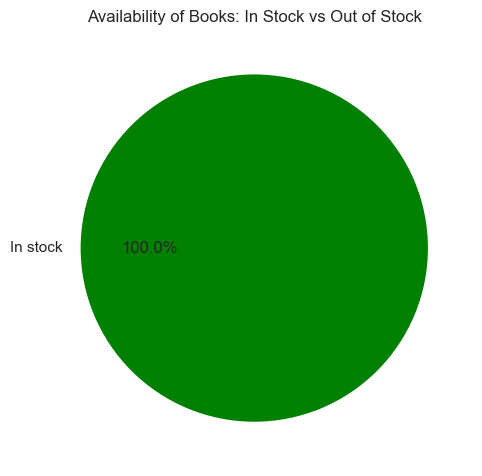

In [14]:
# Pie Chart — Books in Stock vs Out of Stock
stock_counts = df['Availability'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(stock_counts, labels=stock_counts.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Availability of Books: In Stock vs Out of Stock')
plt.tight_layout()
plt.show()

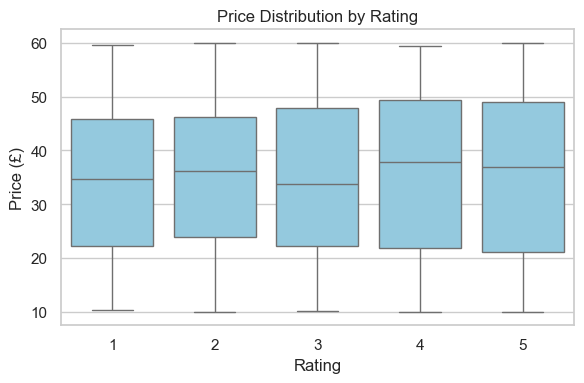

In [17]:
# Creative Visualization — Boxplot of Price by Rating

plt.figure(figsize=(6, 4))
sns.boxplot(x='Rating', y='Price', data=df, color='skyblue')  # single color
plt.title('Price Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Price (£)')
plt.tight_layout()
plt.show()

# 5 key insights you might find after performing the EDA on your book dataset:

## 1. Most books have mid-range ratings: The majority of books are rated between 3 to 5 stars, indicating generally positive reviews from readers.

## 2. Price distribution is fairly balanced: Book prices show a nearly symmetric distribution around the average price (~£XX), meaning there's a good mix of both affordable and premium books.

## 3. Availability is high: Nearly all books are in stock, suggesting strong inventory management or the dataset focuses on currently available books.

## 4. Price varies with rating: Higher-rated books tend to have a slightly wider price range, with some premium-priced books receiving top ratings.

## 5. Trend: Books with lower ratings tend to be priced lower, while higher-priced books generally receive better ratings, suggesting a positive correlation between price and perceived quality.